In [1]:
from prophet import Prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-13,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851
2023-10-14,26866.203125,26969.000000,26814.585938,26861.707031,26861.707031,5388116782
2023-10-15,26858.011719,27289.169922,26817.894531,27159.652344,27159.652344,7098201980
2023-10-16,27162.628906,29448.138672,27130.472656,28519.466797,28519.466797,27833876539
2023-10-17,28540.667969,28551.830078,28130.132812,28551.830078,28551.830078,26021642240


In [6]:
df.reset_index(inplace =True)
df = df[['Date','Adj Close']]
df

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3313,2023-10-13,26862.375000
3314,2023-10-14,26861.707031
3315,2023-10-15,27159.652344
3316,2023-10-16,28519.466797


In [7]:
model = Prophet()

In [10]:
df.columns=['ds','y']
df

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3313,2023-10-13,26862.375000
3314,2023-10-14,26861.707031
3315,2023-10-15,27159.652344
3316,2023-10-16,28519.466797


In [11]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36dtqbqo/ldhwdkep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp36dtqbqo/3n74ovgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78316', 'data', 'file=/tmp/tmp36dtqbqo/ldhwdkep.json', 'init=/tmp/tmp36dtqbqo/3n74ovgv.json', 'output', 'file=/tmp/tmp36dtqbqo/prophet_modelkewvybqu/prophet_model-20231017105904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [13]:
df.tail()

,ds,y
3313,2023-10-13,26862.375000
3314,2023-10-14,26861.707031
3315,2023-10-15,27159.652344
3316,2023-10-16,28519.466797
3317,2023-10-17,28551.830078


In [15]:
future_dates = model.make_future_dataframe(periods=60)

In [16]:
future_dates.tail()

,ds
3373,2023-12-12
3374,2023-12-13
3375,2023-12-14
3376,2023-12-15
3377,2023-12-16


In [17]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3373,2023-12-12,15201.519376,8530.500091,22611.404081
3374,2023-12-13,15169.093457,8735.417679,22312.135802
3375,2023-12-14,15090.722826,8556.258785,21853.840065
3376,2023-12-15,15082.874072,8197.144654,22326.288894
3377,2023-12-16,15084.754096,8009.038524,22010.802007


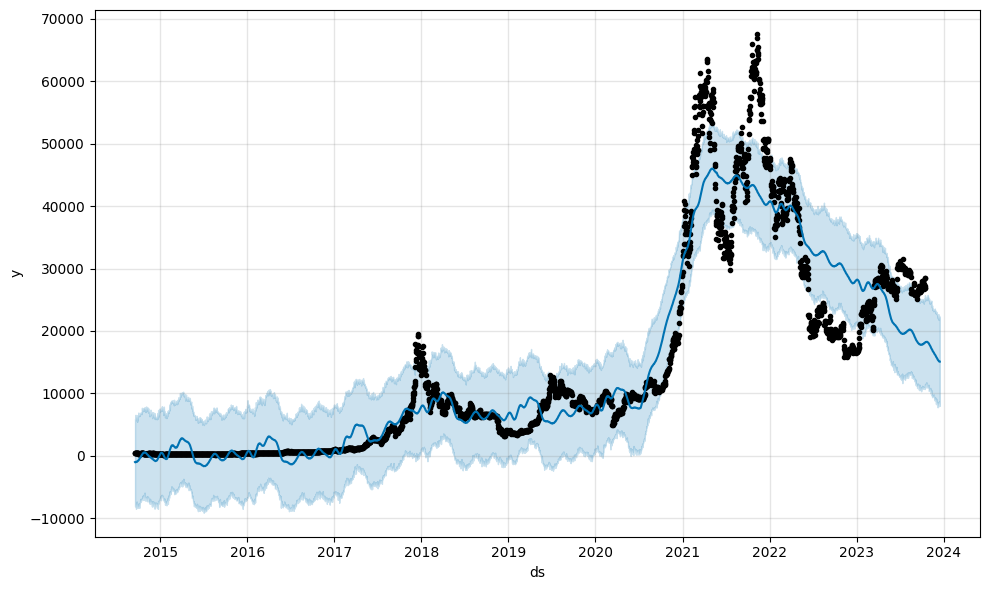

In [18]:
fig1 = model.plot(forecast)

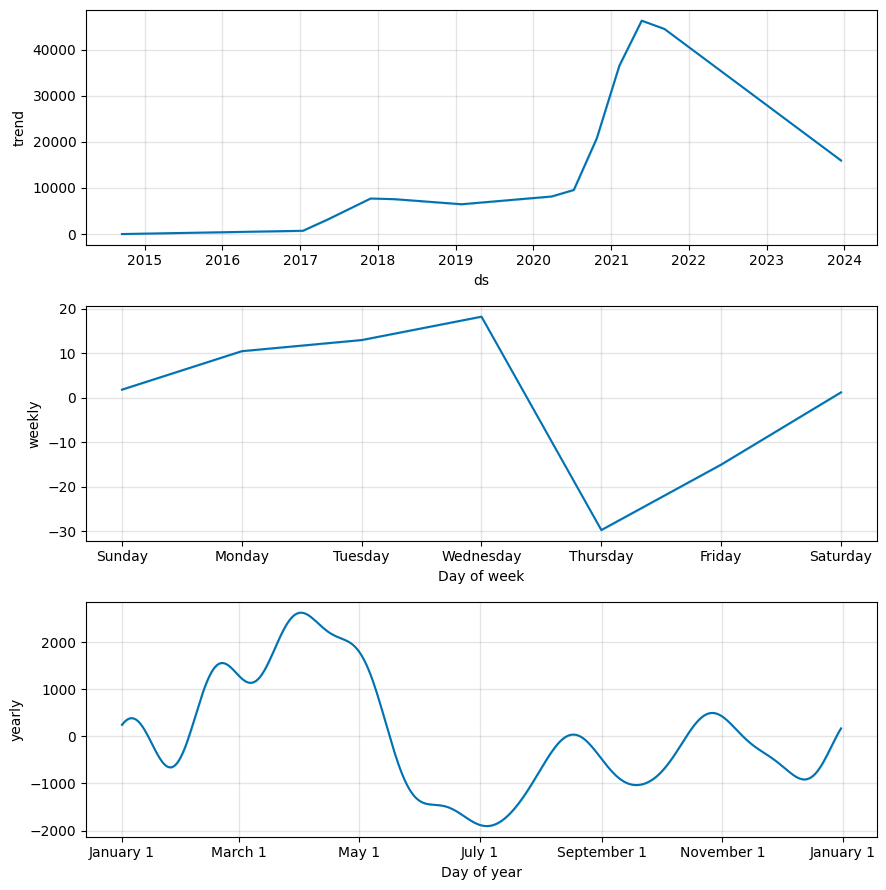

In [19]:
fig2 = model.plot_components(forecast)